# Run-Pass Oracle (RPO)

# Introduction

This submission aims to build a better methodology for predicting, pre-snap, whether a team will pass the ball. To do this, we created the **Run-Pass Oracle** model, built on top of a LightGBM architecture. We managed to achieve performance that surpasses state-of-the-art literature, while still maintaining interpretability. Much of this performance is driven by feature engineering, including metrics such as:
- **TICK**, or more verbosely, **Tempo Including Contextual Knowledge**. This metric combines our **Tempo** metric with other contextual info, such as player weight at key positions, to understand how team personnel and play-calling tendencies combine to predict pass rates
-  **Defensive Congestion**, i.e., the mean pairwise distance between players on defense, with more recent frames weighted more heavily. The clear benefit of this is that we can pick up nuanced info that coarser features, such as offensive formations (e.g., 2x2) and men-in-box counts, may miss.

# 1. Model

Our model is comprised of the following features, including the aformentioned ones:

1. Situational Expected Pass Rate
2. Motion/Shift score
3. Defensive Congestion
4. Offensive backfield count
5. TICK
6. Defensive Congestion
7. QB_RB1 Offset

Their Shapley importances are below:

# TODO: Maybe do a tree instead of Shap, since SHAP undersells our features.

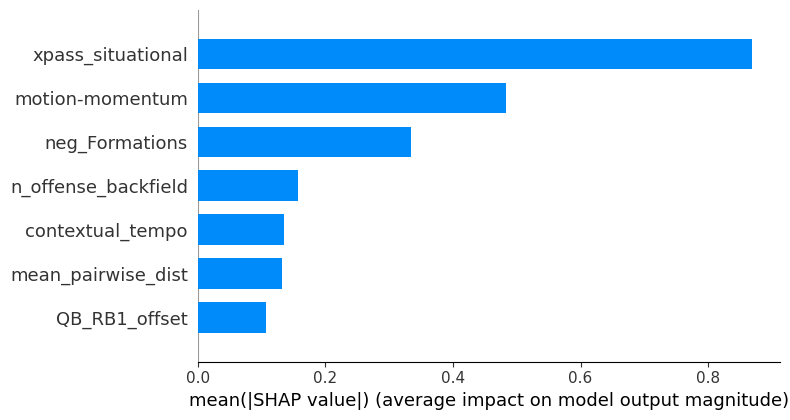

**Situational Expected Pass Rate** is Ben Baldwin's model (link here). While it is the dominant feature in our model, encompassing many other important features, it still is only at about 70% accuracy on its own, and fails to explicitly encompass tracking data & other player info.

**Momentum/shift metric**: TBD

**neg_Formations** Captures which formations negatively impact pass rate.

**QB_rb1_offset** captures the distance between the primary running back (if any) and the QB, implicitly gaining formational info (?)

## a) Model/data design

Our model itself was a LightGBM model, with a maximum depth of 5 as to prevent overfitting. For the 9 weeks of tracking data provided, we trained from weeks 3-7, using week 8 as a validation set, then week 8 as test proper. This was for a couple of reasons:
- Validation benefits blah blah
- Test benefits blah blah

Note how val accuracy helped us show if incremental gain in test is really worth it, maybe mention how final results actually better than what we present idk

### TODO: show a tree here? later?


## b) Model performance

Our model beats most play-level benchmarks (TODO: cite literature) in the public literature for play-level pass prediction. The model we present is, in our opinion, the best blend of interpretability and generalization we've achieved. 

TODO: incorporate validation performance maybe? Does that undermine, or bolster, our case? Try and juice Test performance?

Our model shows a slight bias toward predicting passes; however, this is to be expected, since the general tendency is for teams to pass more frequently. Notably, its misses are essentially equal between events that were runs and passes, suggesting a decent generalizibility.

<img src="image/performance_example.png" width="750" align="center">

# Real-time feature impact

Because we use exponential means w/moving windows blah blah blah, we can actually show the impact of a stat changing the impact of our model in real-time. Below is the effect of defensive congestion on real-time pass odds:

<img src="image/comb.gif" width="750" align="center">